In [295]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as randforest
from sklearn.metrics import mean_absolute_error

In [251]:
PATH_TO_TRAIN = 'csv/train.csv'
PATH_TO_TASK = 'csv/test.csv'

In [252]:
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
task = pd.read_csv(PATH_TO_TASK, index_col='PassengerId')

In [253]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
task.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [256]:
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### КОЛОНКИ

In [257]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Потом найти кареляции где возроста нет
---

In [258]:
train[train['Age'].isna()][:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


---
РАБОТА С ПРИЗНАКОМ ПОЛ


In [259]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [260]:
train['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
task['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

---
РАБОТА С ПРИЗНАКОМ ПОРТ ПОСАДКИ

In [261]:
train[train['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [262]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [263]:
task[task['Embarked'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [264]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [265]:
train['Embarked'].fillna(train['Embarked'].mode().values[0], inplace=True)

In [266]:
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    int64  
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


In [267]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [268]:
train['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3}, inplace=True)
task['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3}, inplace=True)

In [269]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


---
РАБОТА С ПРИЗНАКОМ CABIN

In [270]:
train[train['Cabin'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1
6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,3
8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,1
886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,3
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1


In [271]:
train[~(train['Cabin'].isna())]['Cabin']

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
          ...     
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: Cabin, Length: 204, dtype: object

не нашел взаимосвязей, меняем (на есть нет) (0 : 1)

In [272]:
train['Cabin'] = np.where(train['Cabin'].isna(), 0, 1)
task['Cabin'] = np.where(task['Cabin'].isna(), 0, 1)
# train.loc[~train['Cabin'].isna(), 'Cabin'] = 1
# train.loc[train['Cabin'].isna(), 'Cabin'] = 0

In [273]:
train['Cabin'].value_counts()
task['Cabin'].value_counts()

0    327
1     91
Name: Cabin, dtype: int64

In [274]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int64  
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.5+ KB


---
РАБОТА С ПРИЗНАКОМ FARE

In [275]:
px.box(train, y='Fare')

Видим что есть выбрасы

In [276]:
train[(train['Fare'] > 65) & (train['Pclass'] == 3)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",0,NaN,8,2,CA. 2343,69.55,0,1
181,0,3,"Sage, Miss. Constance Gladys",1,NaN,8,2,CA. 2343,69.55,0,1
202,0,3,"Sage, Mr. Frederick",0,NaN,8,2,CA. 2343,69.55,0,1
325,0,3,"Sage, Mr. George John Jr",0,NaN,8,2,CA. 2343,69.55,0,1
793,0,3,"Sage, Miss. Stella Anna",1,NaN,8,2,CA. 2343,69.55,0,1
847,0,3,"Sage, Mr. Douglas Bullen",0,NaN,8,2,CA. 2343,69.55,0,1
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.55,0,1


In [277]:
train[(train['Fare'] > 70) & (train['Pclass'] == 2)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
73,0,2,"Hood, Mr. Ambrose Jr",0,21.0,0,0,S.O.C. 14879,73.5,0,1
121,0,2,"Hickman, Mr. Stanley George",0,21.0,2,0,S.O.C. 14879,73.5,0,1
386,0,2,"Davies, Mr. Charles Henry",0,18.0,0,0,S.O.C. 14879,73.5,0,1
656,0,2,"Hickman, Mr. Leonard Mark",0,24.0,2,0,S.O.C. 14879,73.5,0,1
666,0,2,"Hickman, Mr. Lewis",0,32.0,2,0,S.O.C. 14879,73.5,0,1


In [278]:
train[(train['Fare'] > 73.5)].sort_values('Fare', ascending=False)[:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,1,2
259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,0,2
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,1,2
28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.0000,1,1
342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,1,1


---
РАБОТА С ПРИЗНАКОМ TICKET

In [279]:
train['Ticket'].value_counts().head(30)

347082           7
CA. 2343         7
1601             7
3101295          6
CA 2144          6
347088           6
S.O.C. 14879     5
382652           5
LINE             4
PC 17757         4
17421            4
349909           4
113760           4
4133             4
113781           4
W./C. 6608       4
2666             4
19950            4
347077           4
C.A. 31921       3
PC 17572         3
C.A. 34651       3
363291           3
F.C.C. 13529     3
345773           3
248727           3
24160            3
29106            3
SC/Paris 2123    3
35273            3
Name: Ticket, dtype: int64

In [280]:
train[(train['Age'] <= 14) & (train['Parch'] == 0) ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,2
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,0,1
40,1,3,"Nicola-Yarred, Miss. Jamila",1,14.0,1,0,2651,11.2417,0,2
126,1,3,"Nicola-Yarred, Master. Elias",0,12.0,1,0,2651,11.2417,0,2
732,0,3,"Hassan, Mr. Houssein G N",0,11.0,0,0,2699,18.7875,0,2
778,1,3,"Emanuel, Miss. Virginia Ethel",1,5.0,0,0,364516,12.4750,0,1
781,1,3,"Ayoub, Miss. Banoura",1,13.0,0,0,2687,7.2292,0,2


---
РАБОТА С ПРИЗНАКОМ AGE

In [281]:
train['Age'].fillna(train['Age'].median(), inplace=True)
task['Age'].fillna(task['Age'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int64  
 10  Embarked  891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.5+ KB


---
next
---

<AxesSubplot:>

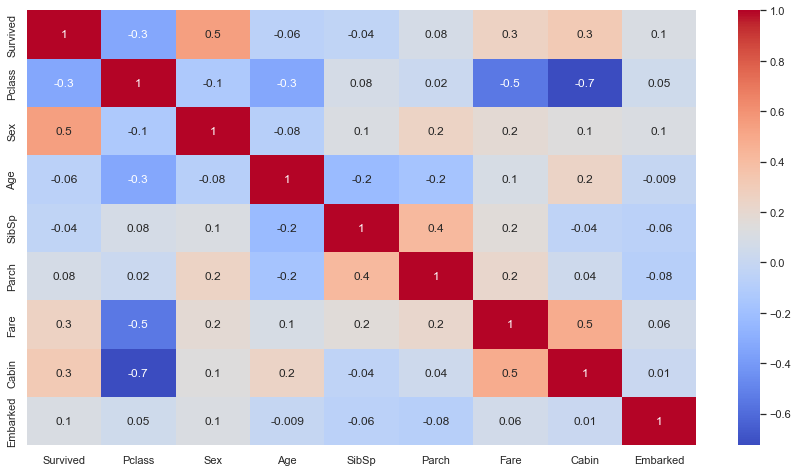

In [284]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.corr(), annot = True, fmt='.1g', cmap='coolwarm')

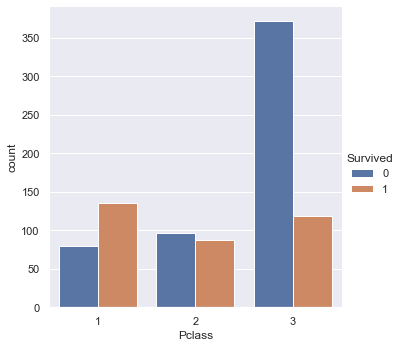

In [286]:
sns.catplot(data=train, x='Pclass', hue='Survived', kind='count')

In [288]:
train.drop(columns=['Name', 'Ticket'], inplace=True)
task.drop(columns=['Name', 'Ticket'], inplace=True)

In [289]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [290]:
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


In [291]:
task['Fare'].median()

14.4542

In [292]:
task['Fare'].fillna(task['Fare'].median(), inplace=True)

In [293]:
task.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    int64  
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.4 KB


In [387]:
def my_rf(train):
    answer = train['Survived']
    data = train.drop(columns=['Survived'])
    x_train, x_test, y_train, y_test = train_test_split(data, answer, test_size=0.2, random_state=1)
    rf = randforest(n_estimators=100, max_depth=6)
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    y_rf = list(map(lambda x: round(x), y_rf))
    predict_error = mean_absolute_error(y_test, y_rf)
    print(f'predict_error = {predict_error}')
    

In [389]:
my_rf(train)

predict_error = 0.2122905027932961
